In [1]:
import numpy as np
import pandas as pd
import scipy.spatial.distance
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white")
from IPython.core.pylabtools import figsize

## Load haplotypes

In [2]:
haplotypes = pd.read_csv('/media/Shared/Data/chum/populations/pstacks/batch_4/batch_4.haplotypes.tsv', sep = '\t')
haplotypes.head()

,Catalog ID,Cnt,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,...,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0010,CMUW10_0011,CMUW10_0012,CMUW10_0015,CMUW10_0016
0,1,194,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,TA,GG/TA,GG/TA,TA,TA,TA,GG/TA,GG/TA,GG/TA
1,2,185,A/G,G,G,G,G,-,-,A/G,...,A/G,G,G,A/G,G,G,G,A/G,G,G
2,4,186,consensus,consensus,consensus,consensus,consensus,-,consensus,-,...,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus
3,7,195,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,...,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GA/GG/TA,GG/TA,GA/TA,GA/GG/TA/TG,GA/TA
4,9,190,A/C,C,A/C,C,A/C,C,A,C,...,C,A,A,A/C,A,A,C,A/C,A,-


In [3]:
haplotypes = haplotypes.set_index('Catalog ID')
haplotypes = haplotypes.drop('Cnt', axis =1 )
haplotypes.head()

,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,CMHAMM10_0017,CMHAMM10_0018,...,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0010,CMUW10_0011,CMUW10_0012,CMUW10_0015,CMUW10_0016
Catalog ID,,,,,,,,,,,,,,,,,,,,,
1,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,TA,GG/TA,GG/TA,TA,TA,TA,GG/TA,GG/TA,GG/TA
2,A/G,G,G,G,G,-,-,A/G,G,G,...,A/G,G,G,A/G,G,G,G,A/G,G,G
4,consensus,consensus,consensus,consensus,consensus,-,consensus,-,consensus,consensus,...,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus,consensus
7,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,GA/TA,GA/TA,...,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GA/GG/TA,GG/TA,GA/TA,GA/GG/TA/TG,GA/TA
9,A/C,C,A/C,C,A/C,C,A,C,C,C,...,C,A,A,A/C,A,A,C,A/C,A,-


In [4]:
haplotypes = haplotypes.replace({'consensus':'A', '-':np.NaN})
haplotypes = haplotypes.dropna(how = 'all')
haplotypes.head()

,CMHAMM10_0002,CMHAMM10_0005,CMHAMM10_0008,CMHAMM10_0011,CMHAMM10_0012,CMHAMM10_0014,CMHAMM10_0015,CMHAMM10_0016,CMHAMM10_0017,CMHAMM10_0018,...,CMUW10_0003,CMUW10_0004,CMUW10_0007,CMUW10_0008,CMUW10_0009,CMUW10_0010,CMUW10_0011,CMUW10_0012,CMUW10_0015,CMUW10_0016
Catalog ID,,,,,,,,,,,,,,,,,,,,,
1,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,GG/TA,...,GG/TA,TA,GG/TA,GG/TA,TA,TA,TA,GG/TA,GG/TA,GG/TA
2,A/G,G,G,G,G,NaN,NaN,A/G,G,G,...,A/G,G,G,A/G,G,G,G,A/G,G,G
4,A,A,A,A,A,NaN,A,NaN,A,A,...,A,A,A,A,A,A,A,A,A,A
7,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/GG/TA/TG,GA/TA,GA/TA,GA/GG/TA,GA/GG/TA/TG,GA/TA,GA/TA,...,GG/TA,GA/TA,GA/TA,GA/TA,GA/TA,GA/GG/TA,GG/TA,GA/TA,GA/GG/TA/TG,GA/TA
9,A/C,C,A/C,C,A/C,C,A,C,C,C,...,C,A,A,A/C,A,A,C,A/C,A,NaN


In [5]:
haplotypes.shape

(29131, 200)

## from each sample, generate two sequences per locus
    - 1,2,3,4 are variable nuceotides (substituted in below)

    - 9's are invariate positions

    - 0's are missing data

In [6]:
chromosomes = []
for catid, haps in haplotypes.iterrows():
    chrs = []
    for hap_call in haps:
        # get chr1       
        try:
            hap1 = hap_call.split('/')[0]
            var_sites = len(hap1)
            chrs.append(hap1 + '9'*(94-var_sites))
        except AttributeError:
            chrs.append('0'*94)
        # get chr2
        try:
            hap2 = hap_call.split('/')[1]
            chrs.append(hap2 + '9'*(94-var_sites))
        except AttributeError:
            chrs.append('0'*94)
        except IndexError: # homozygous
            hap2 = hap_call.split('/')[0]
            chrs.append(hap2 + '9'*(94-var_sites))
    chromosomes.append(chrs)

In [7]:
pd.DataFrame(chromosomes).shape

(29131, 400)

In [8]:
hap_df = pd.DataFrame(chromosomes).T
hap_df.shape

(400, 29131)

# Calculate pi
as the jaccard similary of sequences:

"Jaccard distance between the points. Given two vectors, u and v, the Jaccard distance is the proportion of those elements u[i] and v[i] that disagree where at least one of them is non-zero."

[http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.spatial.distance.pdist.html]

#### Per locus I produce a distance matrix of pairwise nucleotide difference between chromosomes, somw within population and some between.

#### Different subsets of this distance matrix show within and between population comparisons.

## Still need one more dimension - break up each locus into sites

In [10]:
Pi_of_locus = dict()
for locus in hap_df.columns:
    myseqs = []
    for x in hap_df[locus].values.tolist():
        try:
            myseqs.append(list(x))
        except TypeError:
            myseqs.append([np.NaN]*94)
    myseqs = pd.DataFrame(myseqs)
    myseqs = myseqs.replace({'A':1, 'C':2, 'G':3, 'T':4})
    pdist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(myseqs, 'jaccard'))
    ## found values of 1 to be from comparing missing values to anything non-missing - remove
    pdist_mat = pd.DataFrame(pdist_mat).replace({1:np.NaN})
    ## remove chomosomes with mostly missing values 
    pdist_mat = pdist_mat.dropna(thresh = 50, axis = 0)
    pdist_mat = pdist_mat.dropna(thresh = 50, axis = 1)
    # mean calulated without zeros as self-compairisons    
    Pi_of_locus[locus] = np.nanmean(scipy.spatial.distance.squareform(pdist_mat))

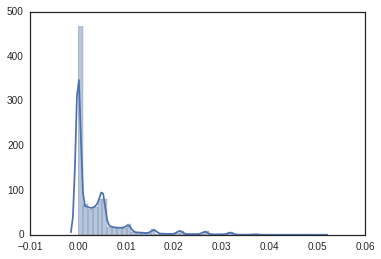

In [11]:
sns.distplot(Pi_of_locus.values())

In [ ]:
assert False

In [ ]:
myseqs = []
for x in hap_df[1].values.tolist():
    try:
        myseqs.append(list(x))
    except TypeError:
        myseqs.append([np.NaN]*94)

In [ ]:
myseqs = pd.DataFrame(myseqs)
myseqs = myseqs.replace({'A':1, 'C':2, 'G':3, 'T':4})
myseqs.head()

In [ ]:
## jaccard distance will all missing values for one array is 1

In [ ]:
scipy.spatial.distance.jaccard(myseqs.ix[22].values, myseqs.ix[20].values)

In [ ]:
myseqs.ix[22].values, myseqs.ix[21].values

In [ ]:
pdist_mat = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(myseqs, 'jaccard'))
pdist_mat = pd.DataFrame(pdist_mat).replace({1:np.NaN})
pdist_mat = pdist_mat.dropna(thresh = 50, axis = 0)
pdist_mat = pdist_mat.dropna(thresh = 50, axis = 1)
pdist_mat.head()

In [ ]:
print 'mean', np.nanmean(scipy.spatial.distance.squareform(pdist_mat)) # mean calulated without zeros as self-compairisons

In [ ]:
scipy.spatial.distance.squareform(pdist_mat)

In [ ]:
figsize(12,12)
sns.clustermap(pdist_mat, square=True, linewidths=0)

In [ ]:
[x for x in 'GGXXXXXXXXXXXXXXXXX']
[x for x in np.NaN]

In [ ]:
## Generate random sequences
NUCLEOTIDES = '11111111111111111111111111111111111111111111111111111234'
NUCLEOTIDES = np.array([x for x in NUCLEOTIDES])
SEQ_LEN = 100
NUM_SEQ = 10

randseqs = np.random.choice(NUCLEOTIDES, size = (NUM_SEQ, SEQ_LEN), replace = True)
pd.DataFrame(randseqs)

normalized Hamming distance

In [ ]:
print 'mean', scipy.spatial.distance.pdist(randseqs, 'hamming').mean() # mean calulated without zeros as self-compairisons
scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(randseqs, 'hamming')).shape